In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("/content/car data.csv")
df.head()   #Printing first five rows 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
len(df["Car_Name"].unique())

98

In [6]:
df.shape  #number of rows and columns present in a dataset

(301, 9)

In [7]:
df.columns  #printing index of all the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#dropping the car_name column
df.drop("Car_Name",axis=1,inplace=True)

In [9]:
df.isnull().values.any()  #is there any null value present

False

In [10]:
# there is no null value present in dataset

In [11]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [12]:
list1=[]  #storing all the features having categorical datatype
for i in df.columns :
    if (df[i].dtype =="object"):
         list1.append(i)

In [13]:
cat_df=df[list1]
cat_df.head() #top five rows of cat_df

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df["Current_Year"]=2020

In [16]:
df["No_of_years"]=df["Current_Year"]-df["Year"]
df=df.drop(["Current_Year","Year"],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [17]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,2.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000


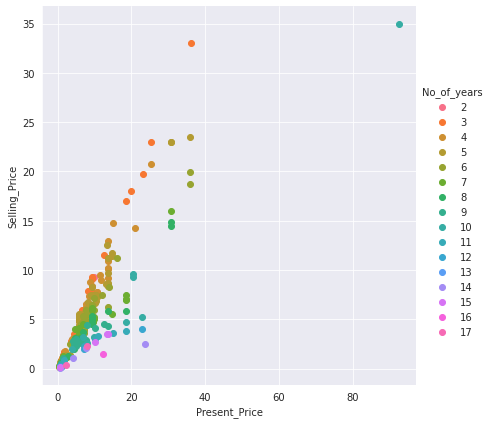

In [18]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="No_of_years",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

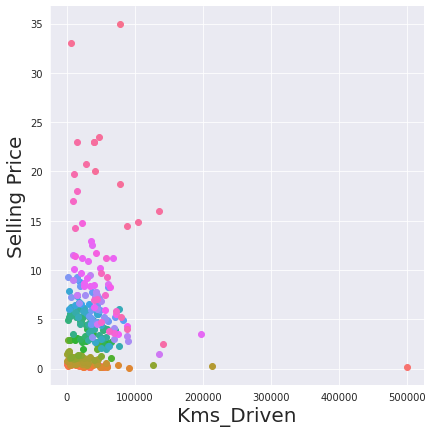

In [19]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Present_Price",height=6).map(plt.scatter,"Kms_Driven","Selling_Price")
plt.xlabel("Kms_Driven",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

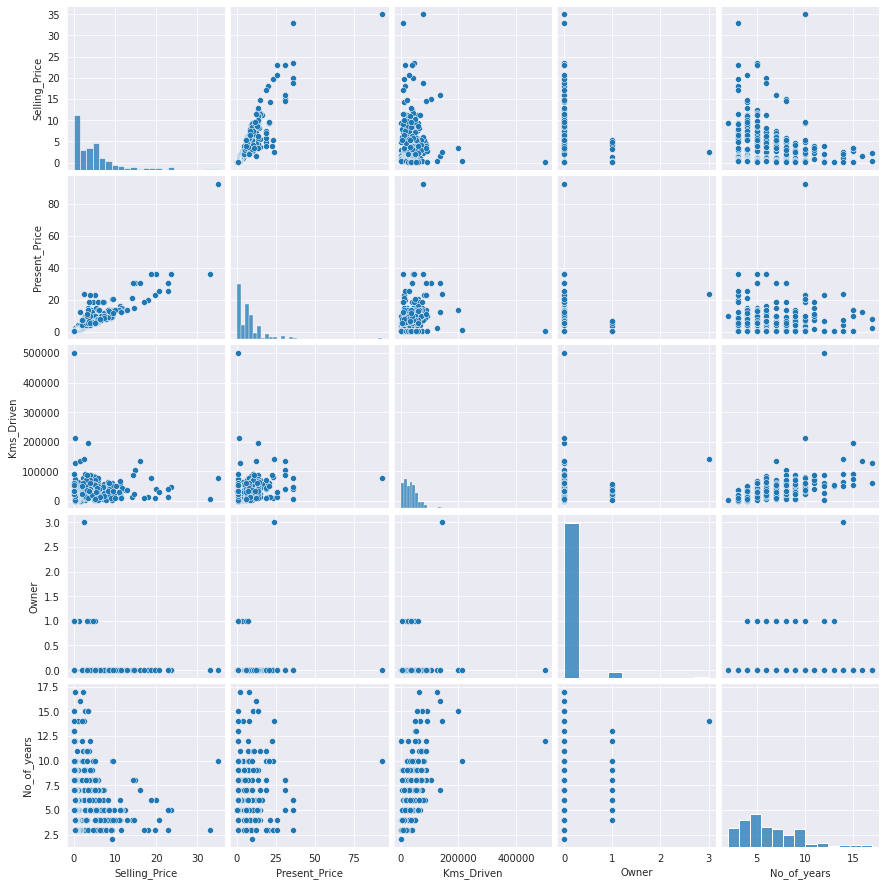

In [20]:
sns.pairplot(df)

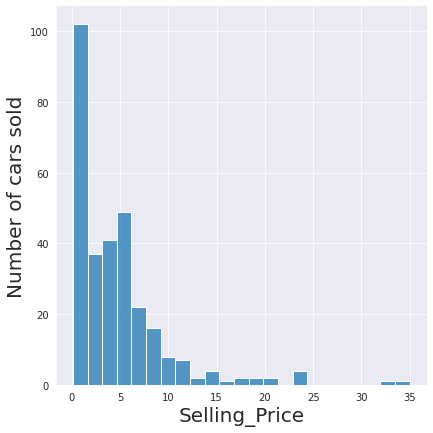

In [21]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Selling_Price")
plt.xlabel("Selling_Price",Fontsize=20)
plt.ylabel("Number of cars sold",Fontsize=20)
plt.show()

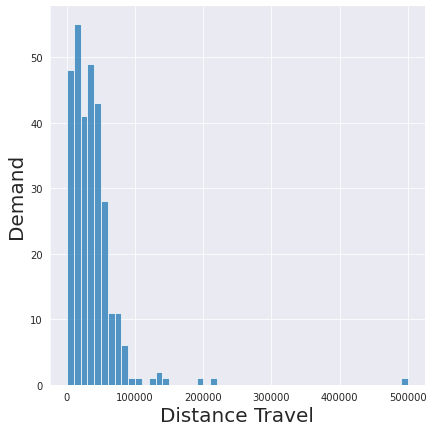

In [22]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Kms_Driven")
plt.xlabel("Distance Travel",Fontsize=20)
plt.ylabel("Demand",Fontsize=20)
plt.show()


[0.14279051 0.08662624 0.03236585 0.00856743 0.00571162 0.00475968
 0.00380775 0.         0.         0.00190387]
[ 0.1   3.59  7.08 10.57 14.06 17.55 21.04 24.53 28.02 31.51 35.  ]


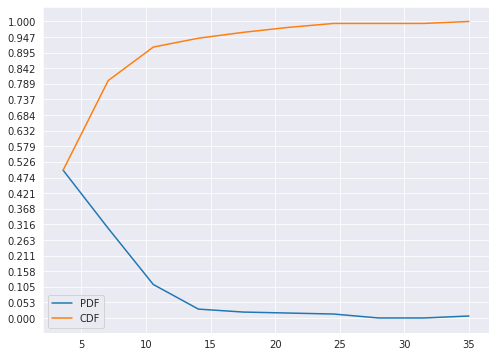

In [23]:
df_Selling_Price=df.loc[:,"Selling_Price"]
count,bin_edges=np.histogram(df_Selling_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


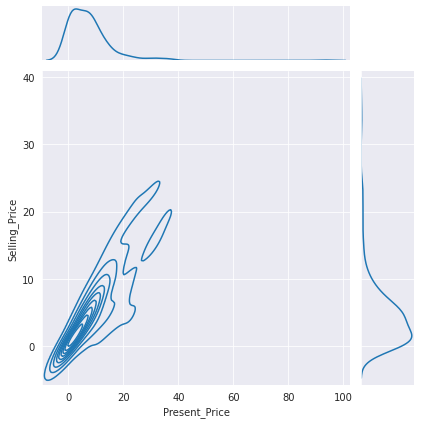

In [24]:
sns.set_style("darkgrid")
sns.jointplot("Present_Price","Selling_Price",data=df,kind="kde")
plt.show()

In [25]:
df=df.drop(list1,axis=1)

In [26]:
dict1={}
for index,col in enumerate(cat_df.columns):
    dict1[col]=cat_df[col].unique().tolist()
dict1   #key is feature and values will be cat variables

{'Fuel_Type': ['Petrol', 'Diesel', 'CNG'],
 'Seller_Type': ['Dealer', 'Individual'],
 'Transmission': ['Manual', 'Automatic']}

In [27]:
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [28]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years
0,3.35,5.59,27000,0,6
1,4.75,9.54,43000,0,7
2,7.25,9.85,6900,0,3
3,2.85,4.15,5200,0,9
4,4.60,6.87,42450,0,6


In [29]:
df=pd.concat([df,cat_df],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [30]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
print(X.shape)
print(Y.shape)

(301, 8)
(301,)


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [32]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

In [34]:
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART 0.8525480285591265 0.1378977818673119
KNN -0.378568879077546 0.47647812753786817
RF 0.9005542810082844 0.13443648836808517
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

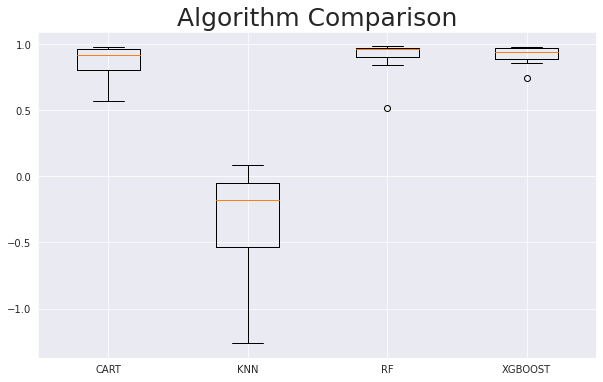

In [35]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

[18:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


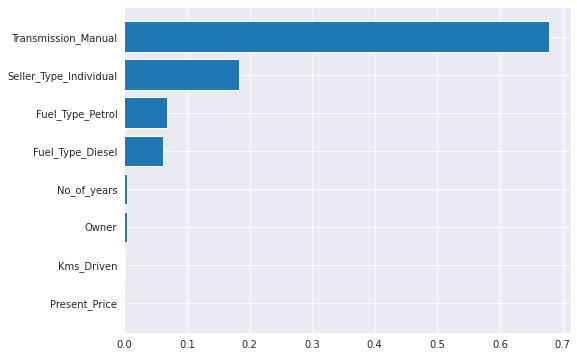

In [36]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,Y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

In [ ]:
param_grid={"n_estimators":[100,120,130,140,150],
            "max_depth":range(1,12),
            "booster":["gbtree","gblinear","dart"]
           }
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBRegressor()
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=100,cv=10)
random_cv.fit(X_train,Y_train)

In [ ]:
random_cv.best_params_

In [39]:
from sklearn.metrics import r2_score 
xgb=XGBRegressor(n_estimators= 130, max_depth=3,booster= 'dart')
xgb.fit(X_train,Y_train)
Y_train_predicted=xgb.predict(X_train)
Y_test_predicted=xgb.predict(X_test)
print("Train set accuracy: ",r2_score(Y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(Y_test,Y_test_predicted))

[18:01:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train set accuracy:  0.9958741667226426
Test set accuracy :  0.9371634717488297


In [40]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)

,Actual,Predicted
285,7.40,7.774484
248,4.00,2.843853
150,0.50,0.586960
217,3.15,3.239444
107,1.25,1.024776
206,5.75,4.949119
132,0.75,0.833545
73,2.65,3.020321
288,8.40,9.422777
157,0.48,0.723673


Text(0, 0.5, 'Probability Density')

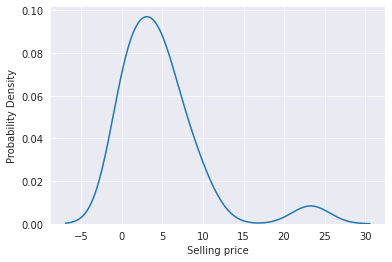

In [41]:
sns.kdeplot(Y_test_predicted)
plt.xlabel('Selling price')
plt.ylabel('Probability Density')

In [ ]:
import pickle

with open("car_price_prediction.pkl","wb") as file:   
pickle.dump(xgb_ran,file)
with open "cat_price_prediction.pkl","rb") as file:
pickle.load(file)